In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import math

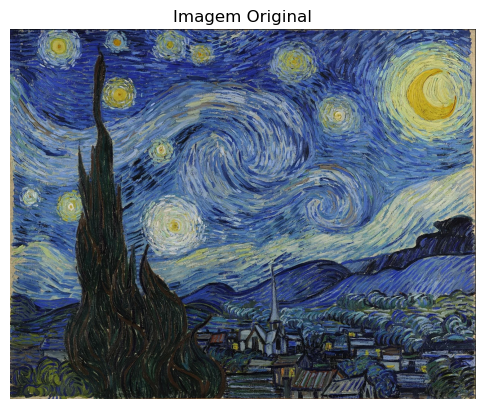

In [2]:
img = cv.imread("../src/starryNight.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

# Questão 1

In [3]:
def RGB2HSV(image):
  R, G, B = cv.split(image)
  B = B / 255
  G = G / 255
  R = R / 255

  H = np.zeros(image.shape[:2])  # Initialize H with the correct shape
  S = np.zeros(image.shape[:2])
  V = np.zeros(image.shape[:2])

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):

      value = 0.5 * ((R[i][j] - G[i][j]) + (R[i][j] - B[i][j])) / (math.sqrt((R[i][j] - G[i][j])**2 + ((R[i][j] - B[i][j])*(G[i][j] - B[i][j]))) + 1e-12)

      tetha = math.degrees(math.acos(value))


      if(B[i][j] > G[i][j]):
        H[i][j] = (360 - tetha) / 360
      else:
        H[i][j] = tetha / 360

      S[i][j] = 1 - ((3) / (R[i][j] + G[i][j] + B[i][j] + 1e-12) * min(R[i][j], G[i][j], B[i][j]))

      V[i][j] = (R[i][j]+ G[i][j]+ B[i][j]) / 3

  H = np.array(H  * 179, np.uint8)
  S = np.array(S  * 255, np.uint8)
  V = np.array(V  * 255, np.uint8)
  hsv = cv.merge((H, S, V))

  return hsv

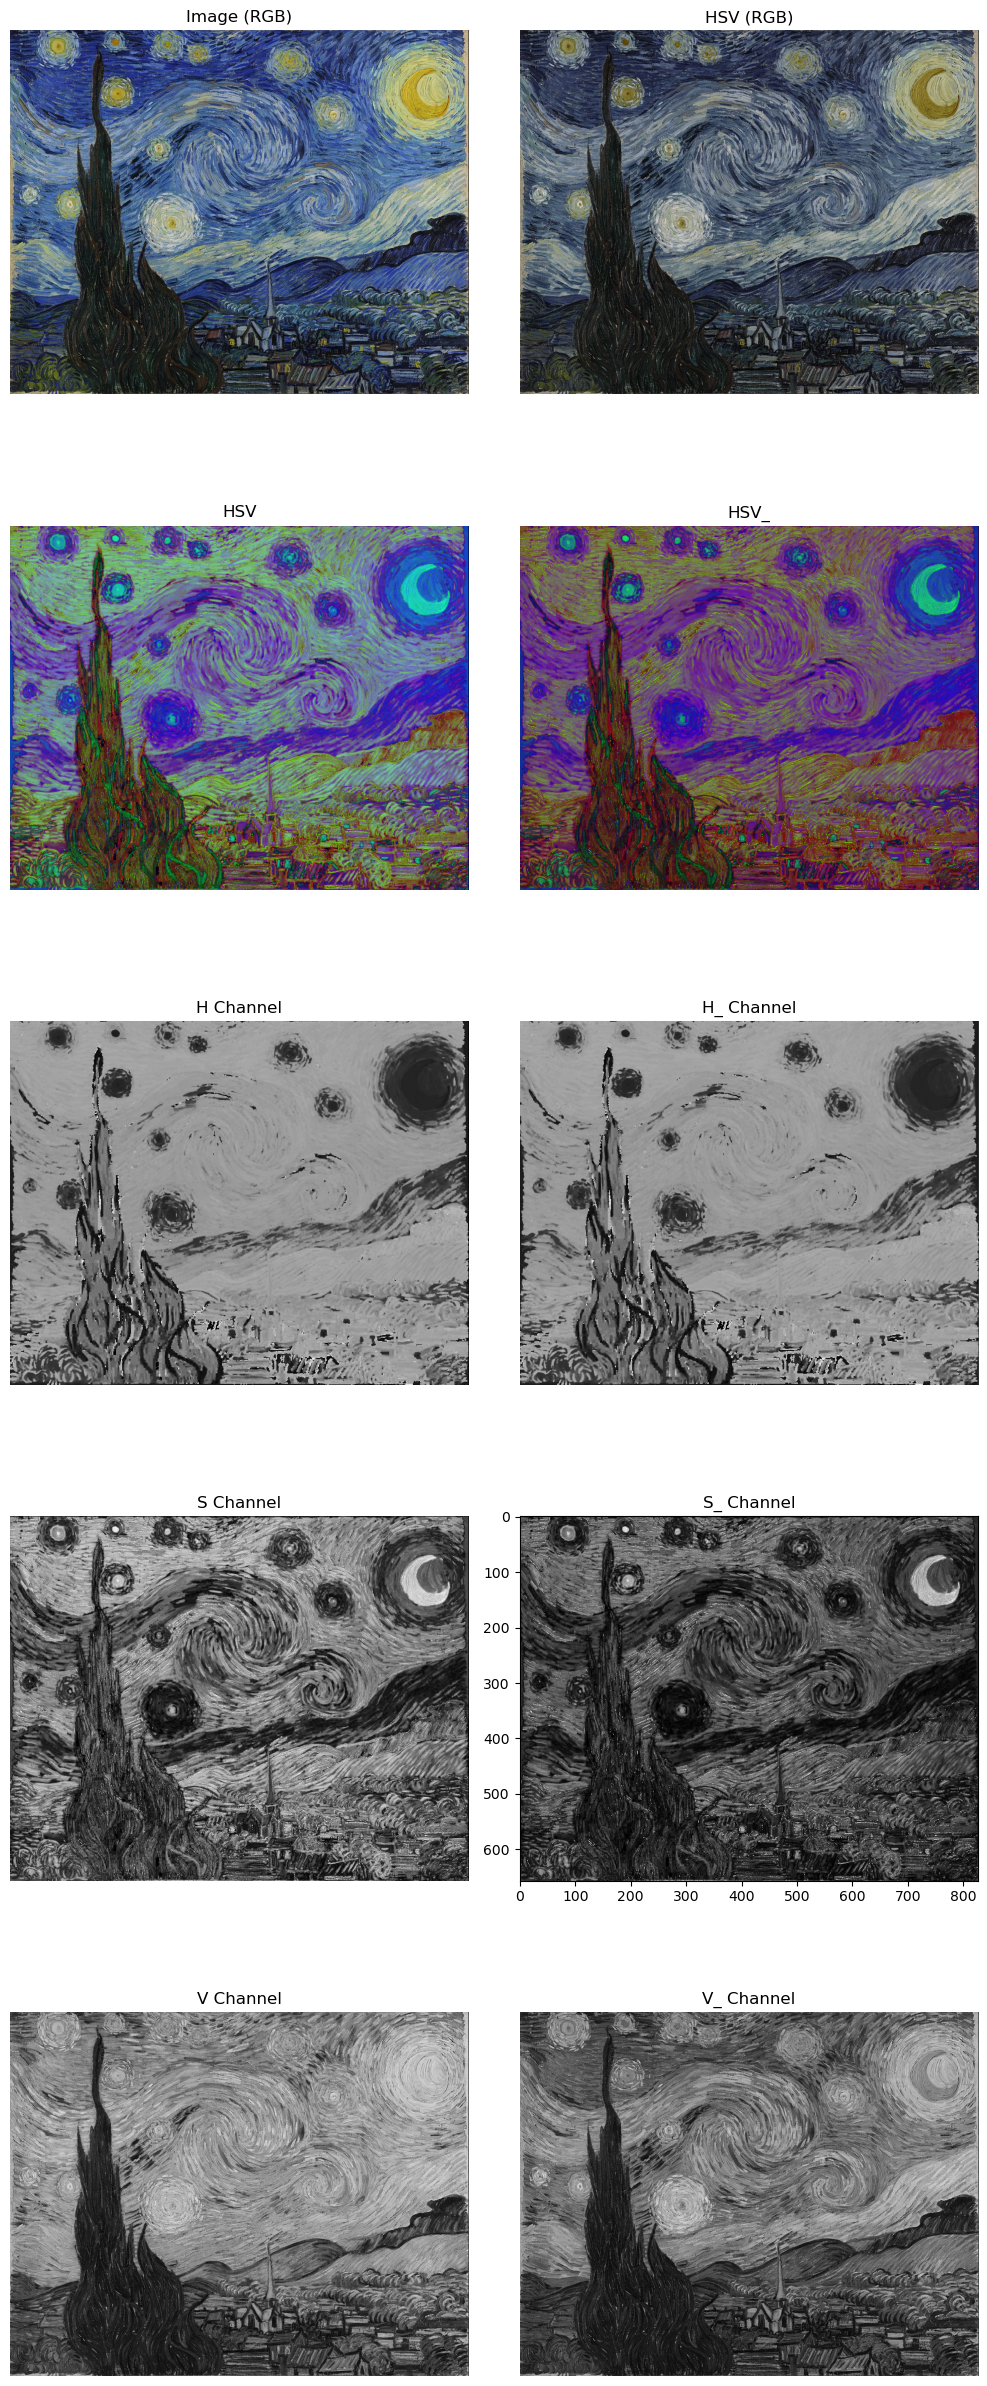

In [4]:
hsv = RGB2HSV(img)

hsv_view = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)
hsv_real = cv.cvtColor(img, cv.COLOR_RGB2HSV)

H, S, V = cv.split(hsv_real)
H_, S_, V_ = cv.split(hsv)

plt.figure(figsize=(10, 25))

plt.subplot(5, 2, 1)
plt.title('Image (RGB)')
plt.imshow(img)
plt.axis('off')

plt.subplot(5, 2, 2)
plt.title('HSV (RGB)')
plt.imshow(hsv_view)
plt.axis('off')

plt.subplot(5, 2, 3)
plt.title('HSV')
plt.imshow(hsv_real)
plt.axis('off')

plt.subplot(5, 2, 4)
plt.title('HSV_')
plt.imshow(hsv)
plt.axis('off')

plt.subplot(5, 2, 5)
plt.title('H Channel')
plt.imshow(H, cmap='gray')
plt.axis('off')

plt.subplot(5, 2, 6)
plt.title('H_ Channel')
plt.imshow(H_, cmap='gray')
plt.axis('off')

plt.subplot(5, 2, 7)
plt.title('S Channel')
plt.imshow(S, cmap='gray')
plt.axis('off')

plt.subplot(5, 2, 8)
plt.title('S_ Channel')
plt.imshow(S_, cmap='gray')

plt.subplot(5, 2, 9)
plt.title('V Channel')
plt.imshow(V, cmap='gray')
plt.axis('off')

plt.subplot(5, 2, 10)
plt.title('V_ Channel')
plt.imshow(V_, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Questão 2

In [5]:
def HSV2RGB(image):
  # Separar os canais H, S e V
  H, S, V = cv.split(image)

  # Normalizar os canais H, S e V entre 0 e 1
  H = (H / 180.0) * 360.0
  S = S / 255.0
  V = V / 255.0


  # Inicializar os canais R, G e B com zeros
  R = np.zeros(image.shape[:2])
  G = np.zeros(image.shape[:2])
  B = np.zeros(image.shape[:2])

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if ((H[i][j] >= 0) and (H[i][j] < 120 )):
        B[i][j] = V[i][j] * (1 - S[i][j])
        R[i][j] = V[i][j] * (1 + ((S[i][j] * math.cos(math.radians(H[i][j])))/(math.cos(math.radians(60 - H[i][j])) + 1e-12)))
        G[i][j] = 3 * V[i][j] - (R[i][j] + B[i][j])
      elif ((H[i][j] >= 120) and (H[i][j] < 240 )):
        H[i][j] = H[i][j] - 120
        R[i][j] = V[i][j] * (1 - S[i][j])
        G[i][j] = V[i][j] * (1 + ((S[i][j] * math.cos(math.radians(H[i][j])))/(math.cos(math.radians(60 - H[i][j])) + 1e-12)))
        B[i][j] = 3 * V[i][j] - (R[i][j] + G[i][j])
      elif ((H[i][j] >= 240) and (H[i][j] < 360 )):
        H[i][j] = H[i][j] - 240
        G[i][j] = V[i][j] * (1 - S[i][j])
        B[i][j] = V[i][j] * (1 + ((S[i][j] * math.cos(math.radians(H[i][j])))/(math.cos(math.radians(60 - H[i][j])) + 1e-12)))
        R[i][j] = 3 * V[i][j] - (G[i][j] + B[i][j])

  # Converter a imagem HSV normalizada para BGR
  R = np.array(R  * 255, np.uint8)
  G = np.array(G  * 255, np.uint8)
  B = np.array(B  * 255, np.uint8)
  rgb = cv.merge((R, G, B))
  return rgb

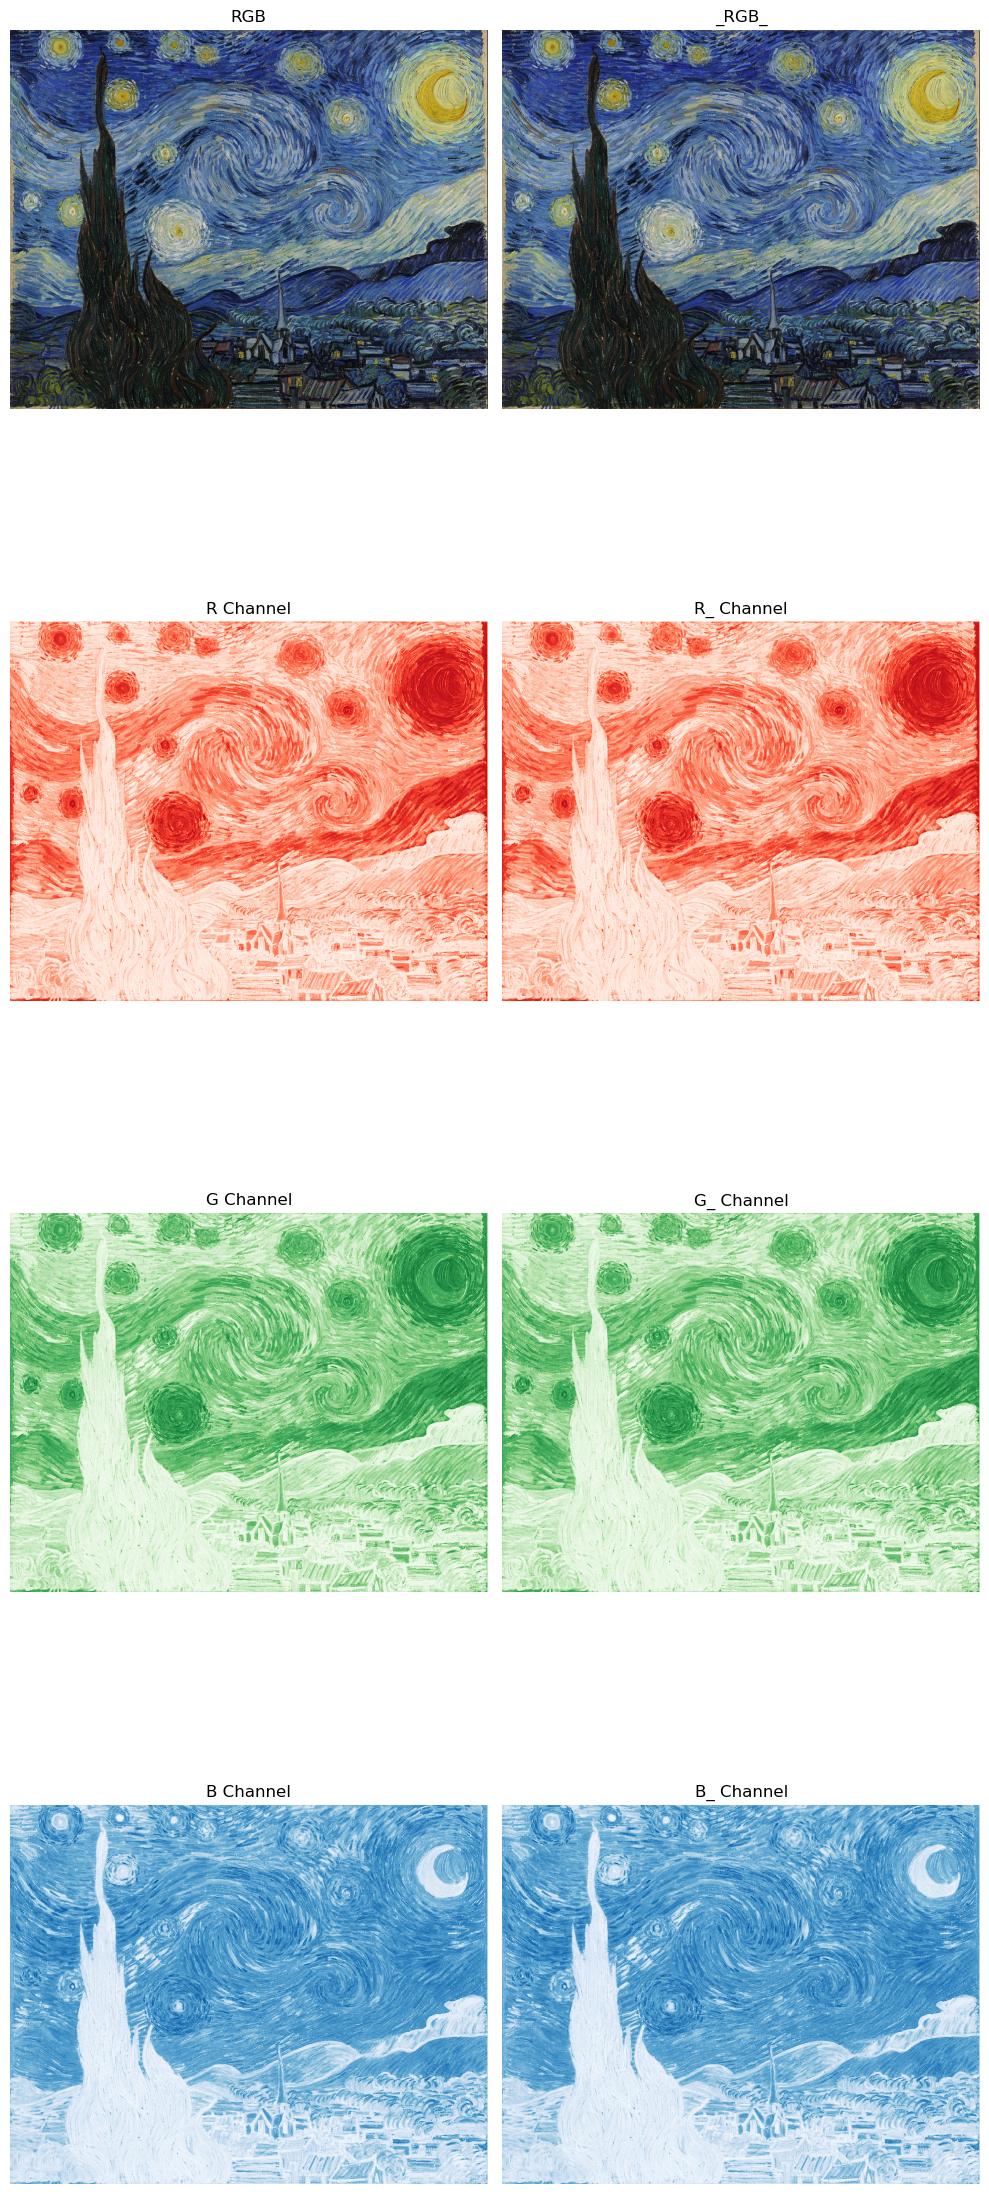

In [6]:
rgb = HSV2RGB(hsv)

R, G, B = cv.split(rgb)
R_, G_, B_ = cv.split(img)

plt.figure(figsize=(10, 25))

plt.subplot(4, 2, 1)
plt.title('RGB')
plt.imshow(rgb)
plt.axis('off')

plt.subplot(4, 2, 2)
plt.title('_RGB_')
plt.imshow(img)
plt.axis('off')

plt.subplot(4, 2, 3)
plt.title('R Channel')
plt.imshow(R, cmap='Reds')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.title('R_ Channel')
plt.imshow(R_, cmap='Reds')
plt.axis('off')

plt.subplot(4, 2, 5)
plt.title('G Channel')
plt.imshow(G, cmap='Greens')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.title('G_ Channel')
plt.imshow(G_, cmap='Greens')
plt.axis('off')

plt.subplot(4, 2, 7)
plt.title('B Channel')
plt.imshow(B, cmap='Blues')
plt.axis('off')

plt.subplot(4, 2, 8)
plt.title('B_ Channel')
plt.imshow(B_, cmap='Blues')
plt.axis('off')

plt.tight_layout()
plt.show()

# Questão 3

In [7]:
def RGB2GRAY(image):
    grayscale_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r, g, b = image[i, j, :]
            grayscale_value = 0.299 * r + 0.587 * g + 0.114 * b
            grayscale_image[i, j] = grayscale_value

    grayscale_image = np.clip(grayscale_image, 0, 255).astype(np.uint8)

    return grayscale_image

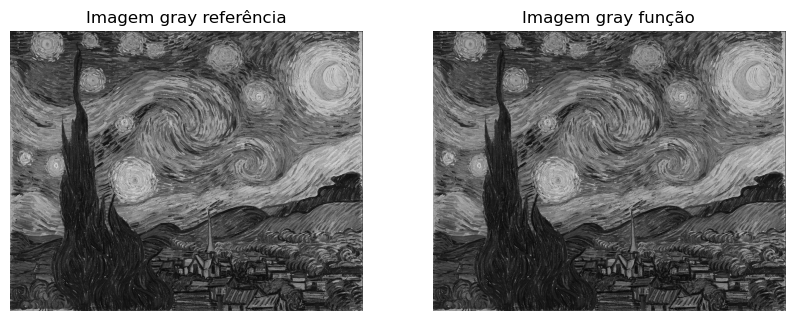

In [8]:
img_grayscale = RGB2GRAY(img)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagem gray referência')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_grayscale, cmap='gray')
plt.title('Imagem gray função')
plt.axis('off')

plt.show()